The test dataset contains four cloud detection categories:

| category           | count | relative |
| ------------------ | ----- | -------- |
| unknown            |     4 | 28.6%    |
| cloud_free         |     2 | 14.3%    |
| probably_cloudy    |     3 | 21.4%    |
| most_likely_cloudy |     5 | 35.7%    |

Note that the relative counts don't correspond to cloud fractions as the undefined values should not be taken into account for the computation of cloud fractions.

The true cloud fractions are:
* `probably_cloudy`: 30%
* `most_likely_cloudy`: 50%
* total (any of the two): 80%

In [1]:
using NCDatasets
using Statistics
ds = Dataset("test_cloud_flag_nofill.nc")
collect(ds["cloud_flag"])

14-element Array{Int16,1}:
 -1
  0
  1
  2
  1
  2
  0
  1
  2
  2
 -1
 -1
 -1
  2

The variable is an `Int16` :-)

# Mean cloudiness
This one is obviously wrong as the flag is not intended to be used as a numeric value:

In [2]:
mean(ds["cloud_flag"])

0.6428571428571429

... wrong, but we knew that.

Let's have a look at the meanings:

In [3]:
meanings = Dict(zip(split(ds["cloud_flag"].attrib["flag_meanings"]), ds["cloud_flag"].attrib["flag_values"]))

Dict{SubString{String},Int16} with 4 entries:
  "most_likely_cloudy" => 2
  "unknown"            => -1
  "cloud_free"         => 0
  "probably_cloudy"    => 1

Perfect, there are four classes. Let's check the cloud fraction:

In [4]:
mean(ds["cloud_flag"] .== meanings["most_likely_cloudy"])

0.35714285714285715

Hmm, that is not nice...

Ok, lets go check all of those flags individually:

In [5]:
sum(ds["cloud_flag"] .== meanings["most_likely_cloudy"]) /
sum([x ⊆ [meanings[m] for m in ["most_likely_cloudy", "probably_cloudy", "cloud_free"]] for x in ds["cloud_flag"]])

0.5

Ok, at least now, we get the right number :-)

# how does the data look without thinking about it?

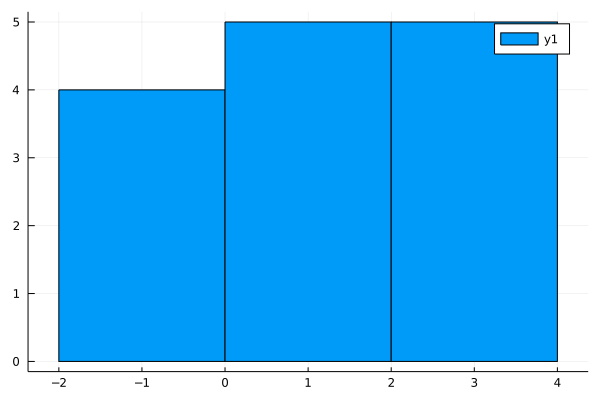

In [6]:
using Plots
histogram(collect(ds["cloud_flag"]))

Huh? This is maybe due to my unability to program in Julia.

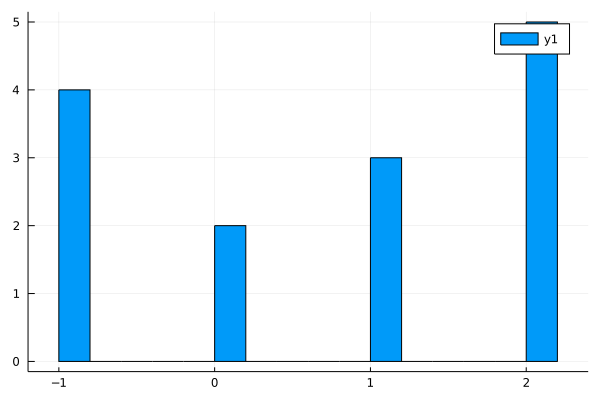

In [7]:
histogram(collect(ds["cloud_flag"]); bins=length(ds["cloud_flag"]))